In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sys

path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
import warnings
import glob
warnings.filterwarnings("ignore")

In [2]:
tweets_toxic = pd.read_csv(r"../files/tweets/tweets_toxicity.csv", lineterminator="\n", encoding="utf-8", low_memory=False)
tweets_toxic

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,NaN,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN,2020-01-27,238
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,NaN,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN,2020-01-27,286
2,L'indifferenza è più colpevole della violenza ...,0.037881,1221730009989120001,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020,NaN,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN,2020-01-27,1
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,NaN,NaN,NaN,NaN,2020-01-27,90
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,NaN,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN,2020-01-27,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907813,Il medico testimonial pro vaccino a Ariachetir...,0.043032,1394609996197937159,CiaoGrosso,[],[],Tue May 18 11:05:08 +0000 2021,NaN,Tue May 18 10:45:35 +0000 2021,NaN,NaN,2021-05-18,506
3907814,"""...«Ha lividi e piastrine basse». E ha richie...",0.045092,1394610015823147011,Rosskitty77,"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],Tue May 18 11:05:13 +0000 2021,NaN,NaN,1.394602e+18,NaN,2021-05-18,1095
3907815,"Vaccinazioni nei luoghi di lavoro, fondamental...",0.007983,1394609887641022464,GuidoIafrate,"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],Tue May 18 11:04:42 +0000 2021,NaN,NaN,NaN,NaN,2021-05-18,3
3907816,A lariachetira c’è un MEDICO DI BASE che ha ap...,0.317855,1394609899963830275,lucabattanta,[],"[{'text': 'lariachetira', 'indices': [14, 27]}]",Tue May 18 11:04:45 +0000 2021,NaN,Tue May 18 10:36:02 +0000 2021,NaN,NaN,2021-05-18,3025


In [3]:
tweets_toxic['dates']= tweets_toxic[["toxicity","date"]].groupby('date').transform('median')
res_for_plot = tweets_toxic.drop_duplicates(subset='date')
res_for_plot.sort_values(by=["date"], inplace=True)

In [4]:
labels =  []
for i in res_for_plot["created_at"]:
    x = i.split(" ")
    month = x[1]
    day = x[2]
    year = x[5][2:]
    value = day + " " + month + " '" + year
    labels.append(value)

In [17]:
data = res_for_plot[["date","dates","count_status"]]
data['rolling_avg'] = data.dates.rolling(14).median()

In [18]:
data['count_rolling_avg'] = data.count_status.rolling(14).median()

In [34]:
data

,date,dates,count_status,rolling_avg,count_rolling_avg
12673,2020-01-02,0.132518,39,NaN,NaN
1883,2020-01-03,0.065269,1163,NaN,NaN
5515,2020-01-04,0.058929,157,NaN,NaN
6279,2020-01-05,0.048526,12,NaN,NaN
7386,2020-01-06,0.077709,47,NaN,NaN
...,...,...,...,...,...
3538756,2021-05-19,0.066122,155,0.047667,172.5
3553961,2021-05-20,0.047839,22,0.048354,121.5
3554638,2021-05-21,0.056732,917,0.049212,172.5
3555254,2021-05-22,0.058929,410,0.049212,172.5


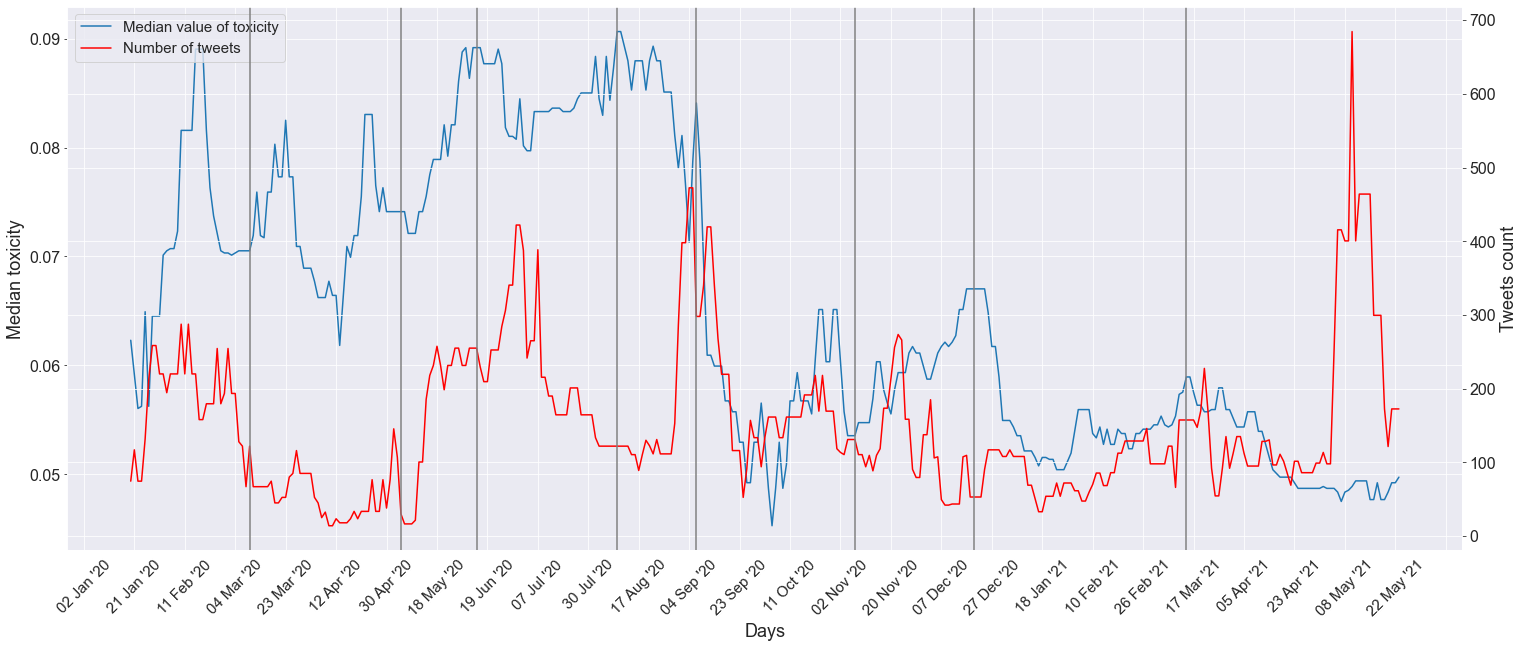

In [68]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 16)
line_1 = ax.plot(data["date"], data["rolling_avg"], label="Median value of toxicity")
# sns.lineplot(x = 'date',
#              y = 'rolling_avg',
#              data = data)
             # label = 'Rolling avg')

ax.set_xlabel('Days', fontsize=18)
ax.set_ylabel('Median toxicity', fontsize=18)

# sns.lineplot(x = 'date',
#              y = 'count_rolling_avg',
#              data = data)
ax2 = ax.twinx()

line_2 = ax2.plot(data["date"], data["count_rolling_avg"], color="r", label="Number of tweets")
ax2.set_ylabel('Tweets count', fontsize=18)
# fig.tight_layout()
lns = line_1+line_2
labs = [l.get_label() for l in lns]
color = "grey"
plt.axvline(x="2020-03-10", color=color) # lockdown (fase 1, 9)
plt.axvline(x="2020-05-04", color=color) # allentamento misure (fase 2, 4)
plt.axvline(x="2020-06-15", color=color) # convivenza (fase 3)
plt.axvline(x="2020-08-11", color=color) # nuove restrizioni (10)
plt.axvline(x="2020-09-06", color=color) # rientro scuole (6)
plt.axvline(x="2020-11-06", color=color) # coprifuoco e zone a colori (6)
plt.axvline(x="2020-12-21", color=color) # ok aifa per vaccino e somministrazioni
plt.axvline(x="2021-03-15", color=color) # Interruzione AZ

plt.yticks(fontsize = 16)
pos = list(data["date"])
lab = labels
plt.xticks(pos, lab)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.legend(lns, labs, loc=2, prop={'size': 15})
plt.show()

In [34]:
pos

['2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-08',
 '2020-01-09',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-30',
 '2020-01-31',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-31',
 '2020-04-02',
 '2020-04-03',
 '2020-04-

In [69]:
# split tweets:
primi_casi = "2020-02-17"
fase_1 = "2020-03-9"
fase_2 = "2020-05-4"
fase_3 = "2020-06-15"
nuove_restizioni = "2020-08-12"
rientro_presenza = "2020-09-6" #scuole in presenza
zone_colori = "2020-11-10"
vaccino = "2020-12-21"
az_interruzione = "2021-03-15"
allentamento_misure_gp = "2021-05-26"

In [70]:
tweets_toxic.head()

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status,dates
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,NaN,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN,2020-01-27,238,0.039942
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,NaN,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN,2020-01-27,286,0.039942
2,L'indifferenza è più colpevole della violenza ...,0.037881,1221730009989120001,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020,NaN,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN,2020-01-27,1,0.039942
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,NaN,NaN,NaN,NaN,2020-01-27,90,0.039942
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,NaN,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN,2020-01-27,616,0.039942


In [71]:
tweets_toxic = tweets_toxic.set_index(tweets_toxic['date'])
tweets_toxic = tweets_toxic.sort_index()
tweets_toxic.head()

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status,dates
date,,,,,,,,,,,,,,
2020-01-02,Vaccino_21 SingingMonsters Oh my goodness this...,0.072803,1212599650953416704,ExplorerMonster,[],[],Thu Jan 02 05:01:00 +0000 2020,Vacino_21,NaN,NaN,9.678867e+17,2020-01-02,2,0.132518
2020-01-02,I'll start this year with a drawing that I rea...,0.093875,1212774754769395712,ChrisGoesHi,[],[],Thu Jan 02 16:36:48 +0000 2020,NaN,Thu Jan 02 01:21:16 +0000 2020,NaN,NaN,2020-01-02,1,0.132518
2020-01-02,Un libretto delle vaccinazioni sotto pelle. L'...,0.011107,1212776541366734849,caraca62,[],[],Thu Jan 02 16:43:54 +0000 2020,NaN,Thu Jan 02 13:44:39 +0000 2020,NaN,NaN,2020-01-02,186,0.132518
2020-01-02,&lt;&lt;Nell'elenco dei relatori del convegno ...,0.032731,1212792723092262912,TutankhatonEdit,[],[],Thu Jan 02 17:48:12 +0000 2020,NaN,Thu Jan 02 11:28:48 +0000 2020,1.212674e+18,NaN,2020-01-02,688,0.132518
2020-01-02,per quelli che....tipo i Burioni nani tutta co...,0.320448,1212797096828514307,angy_cocco,[],"[{'text': 'Burioni', 'indices': [46, 54]}, {'t...",Thu Jan 02 18:05:35 +0000 2020,NaN,Thu Jan 02 12:25:34 +0000 2020,1.203461e+18,NaN,2020-01-02,1108,0.132518


In [72]:
inizio_primi_casi_df = tweets_toxic[:primi_casi]
primi_casi_fase_1_df = tweets_toxic[primi_casi:fase_1]
fase_1_fase_2_df = tweets_toxic[fase_1:fase_2]
fase_2_fase_3_df = tweets_toxic[fase_2:fase_3]
fase_3_restrizioni_df = tweets_toxic[fase_3:nuove_restizioni]
restrizioni_presenza_df = tweets_toxic[nuove_restizioni:rientro_presenza]
presenza_colori_df = tweets_toxic[rientro_presenza:zone_colori]
colori_vaccino_df = tweets_toxic[zone_colori:vaccino]
vaccino_az_df = tweets_toxic[vaccino:az_interruzione]
az_allentamento_df = tweets_toxic[az_interruzione:allentamento_misure_gp]
# gp_in_poi_df = tweets_toxic[allentamento_misure_gp:]
lst = [inizio_primi_casi_df, primi_casi_fase_1_df, fase_1_fase_2_df, fase_2_fase_3_df, fase_3_restrizioni_df,
       restrizioni_presenza_df, presenza_colori_df, colori_vaccino_df, vaccino_az_df, az_allentamento_df]
names = ["fino primi casi", "primi casi - fase 1", "fase 1 - fase 2", "fase 2 - fase 3", "fase 3 - restrizioni",
         "restrizioni - presenza", "presenza - colori", "colori - vaccino", "vaccino - az", "az - allentamenti"]

In [45]:
for i in range(len(lst)):
    print(f"{names[i]} - {np.nanmedian(lst[i]['toxicity'])}, len: {len(lst[i])}")

fino primi casi - 0.076110736, len: 30113
primi casi - fase 1 - 0.0717155, len: 79643
fase 1 - fase 2 - 0.0789077, len: 182689
fase 2 - fase 3 - 0.09548495, len: 21542
fase 3 - restrizioni - 0.08635602, len: 98516
restrizioni - presenza - 0.0681194, len: 118220
presenza - colori - 0.06012806, len: 130752
colori - vaccino - 0.061726328, len: 306037
vaccino - az - 0.05413456, len: 1468988
az - allentamenti - 0.052136723, len: 1527184


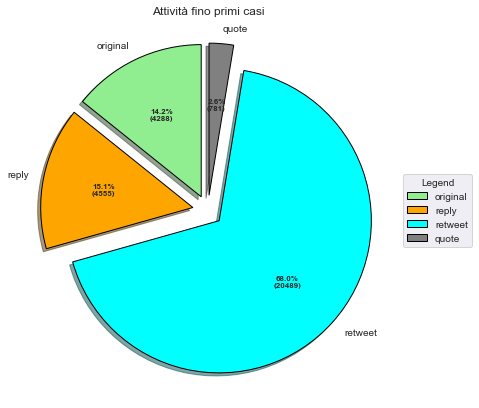

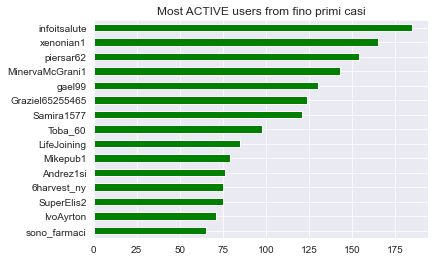

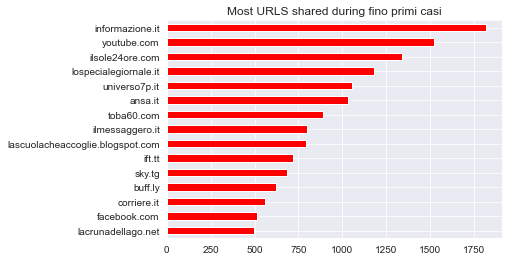

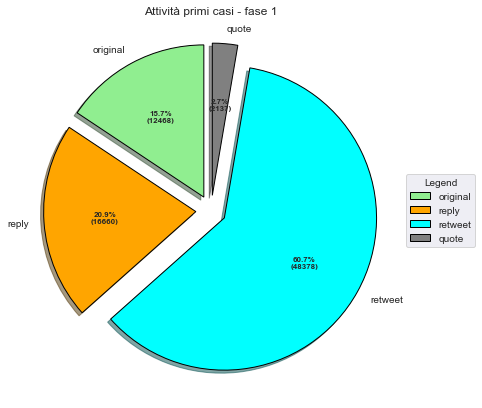

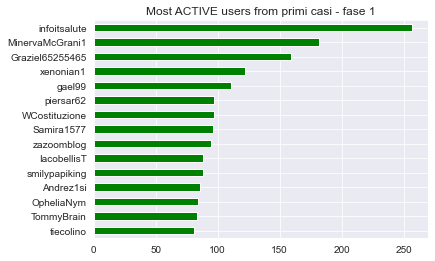

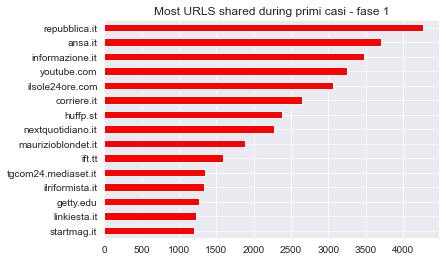

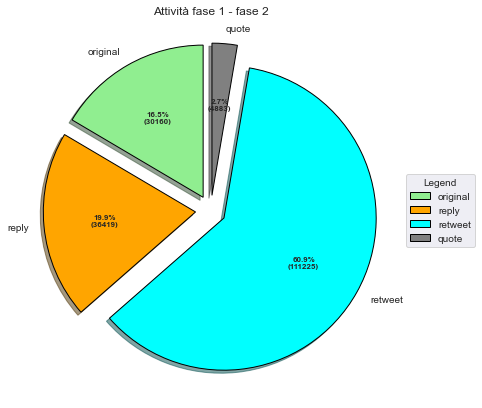

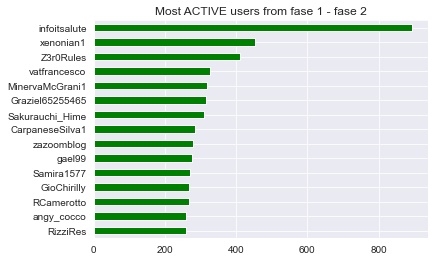

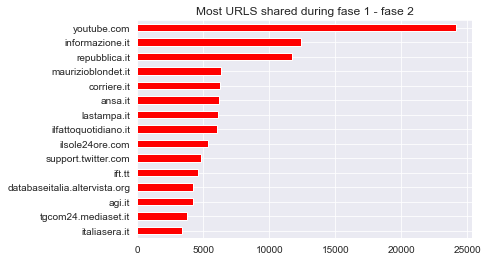

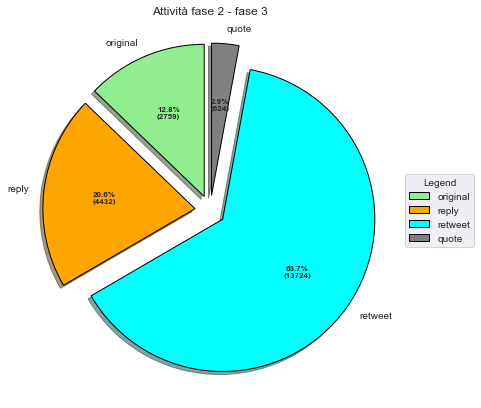

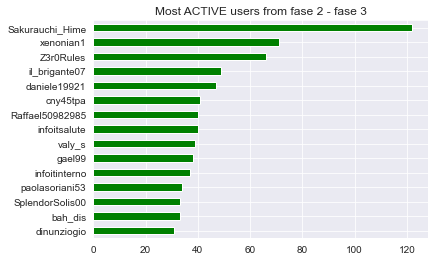

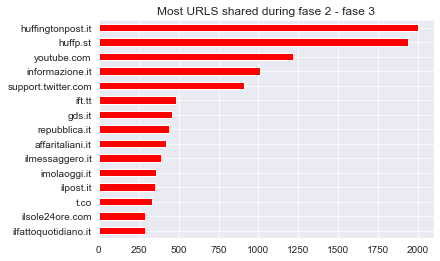

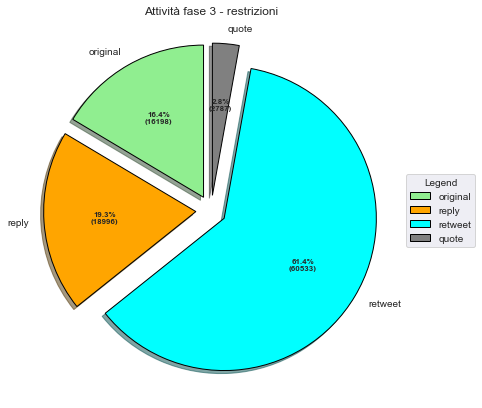

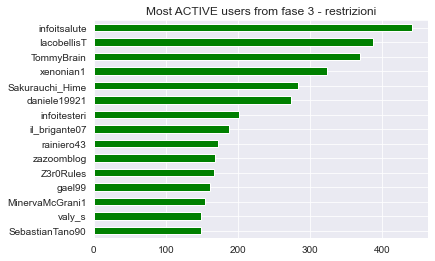

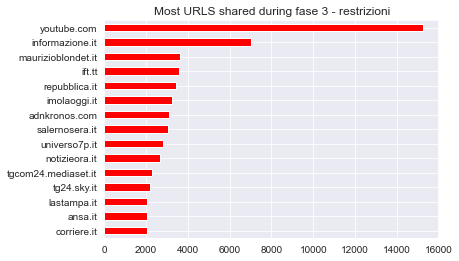

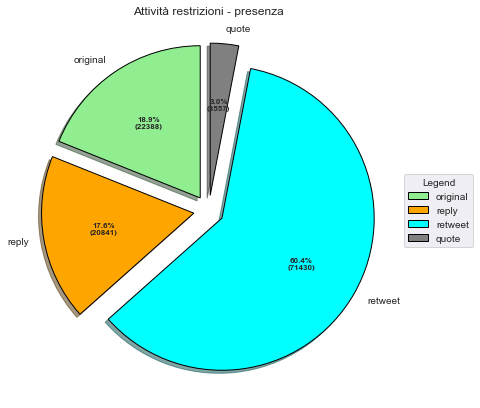

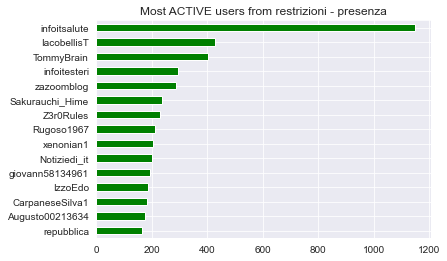

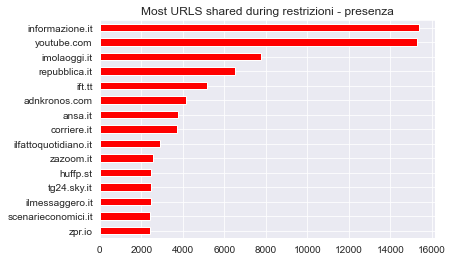

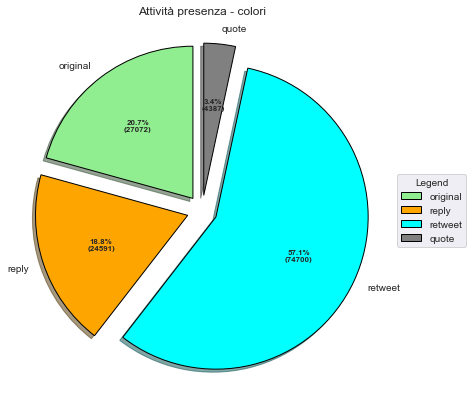

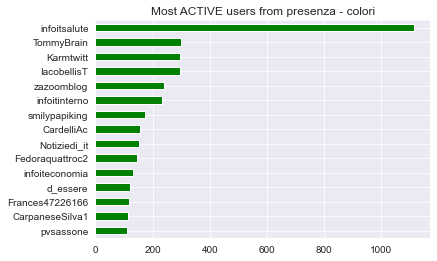

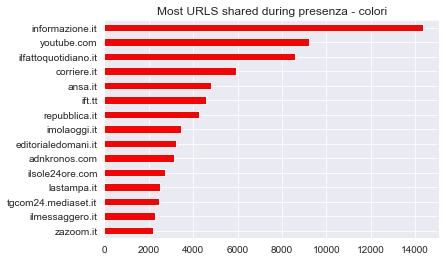

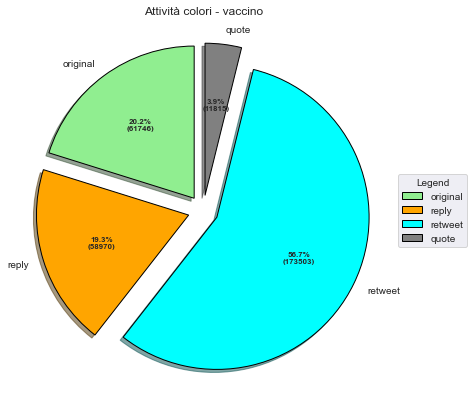

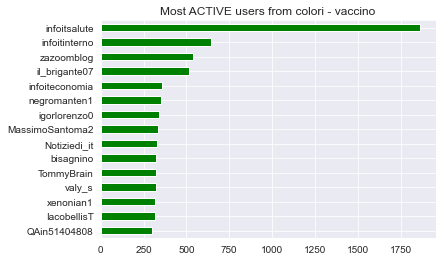

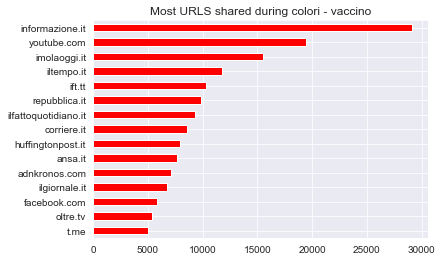

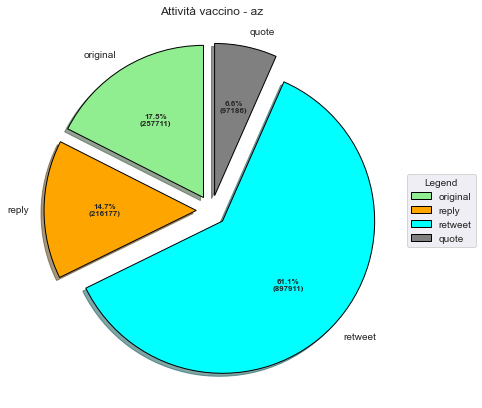

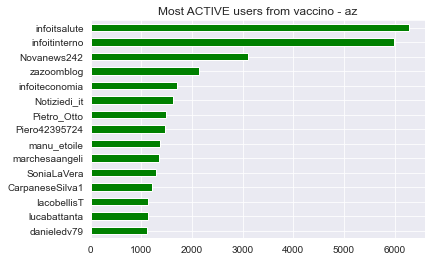

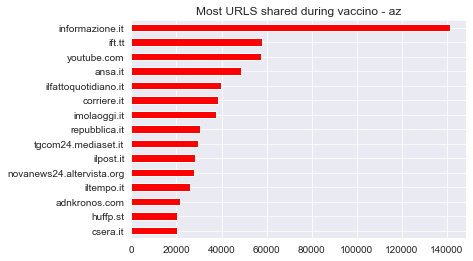

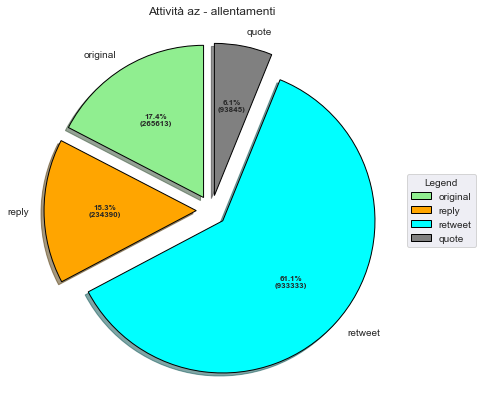

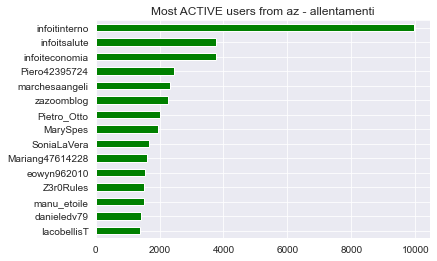

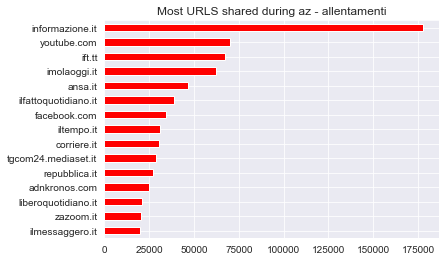

In [46]:
utenti_attivi = []
for i in range(len(lst)):
    x = utils.split(lst[i])
    labels = list(x.keys())
    values = list(x.values())
    utils.print_pie_chart4(f"Attività {names[i]}", labels, values)
    val = pd.Series(lst[i]["user_screen_name"]).value_counts().sort_values(ascending=False)
    utenti_attivi.extend(list(val[:10].keys()))
    fig = plt.figure()
    ax = val[:15].plot(kind='barh', color='green')
    ax.set_title(f'Most ACTIVE users from {names[i]}')
    ax.invert_yaxis()
    x = utils.extract_domain_list(lst[i])
    urls = []
    lst_not_plot = ["dlvr.it", "twitter.com", "tinyurl.com", "trib.al", "bit.ly", "ow.ly"]
    cont = 0
    for v in x:
        if v != []:
            for j in v:
                if (j not in lst_not_plot):
                    if "youtu.be" in j:
                        j = "youtube.com"
                    urls.append(j)
    val = pd.Series(urls).value_counts().sort_values(ascending=False)
    fig = plt.figure()
    ax = val[:15].plot(kind='barh', color='red')
    ax.set_title(f'Most URLS shared during {names[i]}')
    ax.invert_yaxis()
    plt.show()


# Suspended users

In [13]:
df_suspended = pd.DataFrame()
path_suspended = glob.glob(
    r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\script_directory_output\suspended_users\out*.csv")
for i in path_suspended:
    temp = pd.read_csv(i, lineterminator="\n", low_memory=False, encoding="utf-8")
    df_suspended = pd.concat([df_suspended, temp], ignore_index=True)
df_suspended.drop_duplicates(subset=["name"], inplace=True)
df_suspended

,name,status
0,marzia38580873,"[{'code': 50, 'message': 'User not found.'}]"
1,Ivan__soli,ok
2,pat09_04,"[{'code': 50, 'message': 'User not found.'}]"
3,claudeger55,ok
4,ennioflyano,ok
...,...,...
839459,CollectifVrai,ok
839460,Mche10024327,ok
839461,albertotozzi3,"[{'code': 50, 'message': 'User not found.'}]"
839462,HanKer09062021,ok


In [14]:
suspended = df_suspended[(df_suspended["status"].str.contains("code': 50")) | (df_suspended["status"].str.contains("code': 63"))]
suspended

,name,status
0,marzia38580873,"[{'code': 50, 'message': 'User not found.'}]"
2,pat09_04,"[{'code': 50, 'message': 'User not found.'}]"
12,Alien1it,"[{'code': 63, 'message': 'User has been suspen..."
13,maxok07,"[{'code': 63, 'message': 'User has been suspen..."
22,nicolaf_,"[{'code': 50, 'message': 'User not found.'}]"
...,...,...
839445,dylansmysoul2,"[{'code': 50, 'message': 'User not found.'}]"
839446,more_worlds,"[{'code': 63, 'message': 'User has been suspen..."
839451,MarcoMad12,"[{'code': 63, 'message': 'User has been suspen..."
839452,luddynski,"[{'code': 63, 'message': 'User has been suspen..."


In [15]:
tweets_toxic_suspended = tweets_toxic[tweets_toxic["user_screen_name"].isin(list(suspended["name"]))]
serie_attivi_sospesi = pd.Series(tweets_toxic_suspended["user_screen_name"]).value_counts()

In [16]:
for i in list(serie_attivi_sospesi.keys()):
    print(i)
    df_temp = tweets_toxic_suspended[tweets_toxic_suspended["user_screen_name"]==i]
    print(len(df_temp))
    print(df_temp.tail(1)["date"])

manu_etoile
3461
date
2021-05-23    2021-05-23
Name: date, dtype: object
il_brigante07
3289
date
2021-05-23    2021-05-23
Name: date, dtype: object
d_essere
2365
date
2021-05-23    2021-05-23
Name: date, dtype: object
generacomplotti
2170
date
2021-05-23    2021-05-23
Name: date, dtype: object
bisagnino
2112
date
2021-05-23    2021-05-23
Name: date, dtype: object
ManuQ24916888
1986
date
2021-05-23    2021-05-23
Name: date, dtype: object
eterea_eterea
1677
date
2021-04-30    2021-04-30
Name: date, dtype: object
SilviaTeresa14
1553
date
2021-05-23    2021-05-23
Name: date, dtype: object
QAin51404808
1546
date
2021-04-30    2021-04-30
Name: date, dtype: object
igorlorenzo0
1480
date
2021-05-23    2021-05-23
Name: date, dtype: object
Andyphone
1410
date
2021-05-23    2021-05-23
Name: date, dtype: object
Graziel65255465
1409
date
2021-05-23    2021-05-23
Name: date, dtype: object
Cesare_Baronio
1330
date
2021-04-30    2021-04-30
Name: date, dtype: object
paolorm2012
1326
date
2021-05-23    

# Utenti attivi

In [49]:
utenti_attivi = list(set(utenti_attivi))
# utenti_attivi.remove("infoitesteri")
# utenti_attivi.remove("infoiteconomia")
# utenti_attivi.remove("infoitinterno")
# utenti_attivi.remove("Notiziedi_it")
# utenti_attivi.remove("infoitsalute")
# utenti_attivi.remove("repubblica")
utenti_attivi.remove("Novanews242")
utenti_attivi.remove("zazoomblog")
print(len(utenti_attivi))
utenti_attivi

38


['Sakurauchi_Hime',
 'TommyBrain',
 'Z3r0Rules',
 'bisagnino',
 'smilypapiking',
 'Rugoso1967',
 'MinervaMcGrani1',
 'Fedoraquattroc2',
 'gael99',
 'vatfrancesco',
 'Pietro_Otto',
 'CardelliAc',
 'manu_etoile',
 'MarySpes',
 'il_brigante07',
 'SoniaLaVera',
 'Raffael50982985',
 'Mikepub1',
 'igorlorenzo0',
 'IacobellisT',
 'xenonian1',
 'Karmtwitt',
 'Graziel65255465',
 'cny45tpa',
 'LifeJoining',
 'Toba_60',
 'Mariang47614228',
 'Samira1577',
 'valy_s',
 'piersar62',
 'CarpaneseSilva1',
 'rainiero43',
 'MassimoSantoma2',
 'Piero42395724',
 'marchesaangeli',
 'negromanten1',
 'WCostituzione',
 'daniele19921']

In [153]:
tweets_toxic_sas = tweets_toxic[tweets_toxic["user_screen_name"]=="TommyBrain"]
# inizio_primi_casi_df = tweets_toxic_sas[:primi_casi]
primi_casi_fase_1_df = tweets_toxic_sas[primi_casi:fase_1]
fase_1_fase_2_df = tweets_toxic_sas[fase_1:fase_2]
fase_2_fase_3_df = tweets_toxic_sas[fase_2:fase_3]
fase_3_restrizioni_df = tweets_toxic_sas[fase_3:nuove_restizioni]
restrizioni_presenza_df = tweets_toxic_sas[nuove_restizioni:rientro_presenza]
presenza_colori_df = tweets_toxic_sas[rientro_presenza:zone_colori]
colori_vaccino_df = tweets_toxic_sas[zone_colori:vaccino]
vaccino_az_df = tweets_toxic_sas[vaccino:az_interruzione]
az_allentamento_df = tweets_toxic_sas[az_interruzione:allentamento_misure_gp]
# gp_in_poi_df = tweets_toxic[allentamento_misure_gp:]
lst = [inizio_primi_casi_df, primi_casi_fase_1_df, fase_1_fase_2_df, fase_2_fase_3_df, fase_3_restrizioni_df,
       restrizioni_presenza_df, presenza_colori_df, colori_vaccino_df, vaccino_az_df, az_allentamento_df]
names = ["fino primi casi", "primi casi - fase 1", "fase 1 - fase 2", "fase 2 - fase 3", "fase 3 - restrizioni",
         "restrizioni - presenza", "presenza - colori", "colori - vaccino", "vaccino - az", "az - allentamenti"]

TypeError: cannot do slice indexing on Int64Index with these indexers [2020-02-17] of type str

In [ ]:
tweets_toxic_min = tweets_toxic[tweets_toxic["user_screen_name"]=="MinervaMcGrani1"]
inizio_primi_casi_df = tweets_toxic_min[:primi_casi]
primi_casi_fase_1_df = tweets_toxic_min[primi_casi:fase_1]
fase_1_fase_2_df = tweets_toxic_min[fase_1:fase_2]
fase_2_fase_3_df = tweets_toxic_min[fase_2:fase_3]
fase_3_restrizioni_df = tweets_toxic_min[fase_3:nuove_restizioni]
restrizioni_presenza_df = tweets_toxic_min[nuove_restizioni:rientro_presenza]
presenza_colori_df = tweets_toxic_min[rientro_presenza:zone_colori]
colori_vaccino_df = tweets_toxic_min[zone_colori:vaccino]
vaccino_az_df = tweets_toxic_min[vaccino:az_interruzione]
az_allentamento_df = tweets_toxic_min[az_interruzione:allentamento_misure_gp]
# gp_in_poi_df = tweets_toxic[allentamento_misure_gp:]
lst = [inizio_primi_casi_df, primi_casi_fase_1_df, fase_1_fase_2_df, fase_2_fase_3_df, fase_3_restrizioni_df,
       restrizioni_presenza_df, presenza_colori_df, colori_vaccino_df, vaccino_az_df, az_allentamento_df]
names = ["fino primi casi", "primi casi - fase 1", "fase 1 - fase 2", "fase 2 - fase 3", "fase 3 - restrizioni",
         "restrizioni - presenza", "presenza - colori", "colori - vaccino", "vaccino - az", "az - allentamenti"]

In [5]:
# for i in range(len(lst)):
#     x = utils.split(lst[i])
#     labels = list(x.keys())
#     values = list(x.values())
#     utils.print_pie_chart4(f"Attività {names[i]}", labels, values)
#     x = utils.extract_domain_list(lst[i])
#     urls = []
#     lst_not_plot = ["dlvr.it", "twitter.com", "tinyurl.com", "trib.al", "bit.ly", "ow.ly"]
#     cont = 0
#     for v in x:
#         if v != []:
#             for j in v:
#                 if (j not in lst_not_plot):
#                     if "youtu.be" in j:
#                         j = "youtube.com"
#                     urls.append(j)
#     val = pd.Series(urls).value_counts().sort_values(ascending=False)
#     fig = plt.figure()
#     ax = val[:15].plot(kind='barh', color='red')
#     ax.set_title(f'Most URLS shared during {names[i]}')
#     ax.invert_yaxis()
#     plt.show()

In [59]:
for i in range(len(lst)):
    print(f"{names[i]} - {np.nanmedian(lst[i]['toxicity'])}, len: {len(lst[i])}")

fino primi casi - 0.036508016, len: 41
primi casi - fase 1 - 0.04818217, len: 83
fase 1 - fase 2 - 0.023803791, len: 231
fase 2 - fase 3 - 0.02809576, len: 7
fase 3 - restrizioni - 0.061126977, len: 370
restrizioni - presenza - 0.056731742, len: 402
presenza - colori - 0.105704986, len: 299
colori - vaccino - 0.079307266, len: 321
vaccino - az - 0.04131502, len: 1087
az - allentamenti - 0.033846995000000005, len: 1284


In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 16)
line_1 = ax.plot(data["date"], data["rolling_avg"], label="Median value of toxicity")
# sns.lineplot(x = 'date',
#              y = 'rolling_avg',
#              data = data)
             # label = 'Rolling avg')

ax.set_xlabel('Days', fontsize=18)
ax.set_ylabel('Median toxicity', fontsize=18)

# sns.lineplot(x = 'date',
#              y = 'count_rolling_avg',
#              data = data)
ax2 = ax.twinx()

line_2 = ax2.plot(data["date"], data["count_rolling_avg"], color="r", label="Number of tweets")
ax2.set_ylabel('Tweets count', fontsize=18)
# fig.tight_layout()
lns = line_1+line_2
labs = [l.get_label() for l in lns]
color = "grey"
plt.axvline(x="2020-03-10", color=color) # lockdown (fase 1, 9)
plt.axvline(x="2020-05-04", color=color) # allentamento misure (fase 2, 4)
plt.axvline(x="2020-06-15", color=color) # convivenza (fase 3)
plt.axvline(x="2020-08-11", color=color) # nuove restrizioni (10)
plt.axvline(x="2020-09-06", color=color) # rientro scuole (6)
plt.axvline(x="2020-11-06", color=color) # coprifuoco e zone a colori (6)
plt.axvline(x="2020-12-21", color=color) # ok aifa per vaccino e somministrazioni
plt.axvline(x="2021-03-15", color=color) # Interruzione AZ

plt.yticks(fontsize = 16)
pos = list(data["date"])
lab = labels
plt.xticks(pos, lab)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.legend(lns, labs, loc=2, prop={'size': 15})
plt.show()

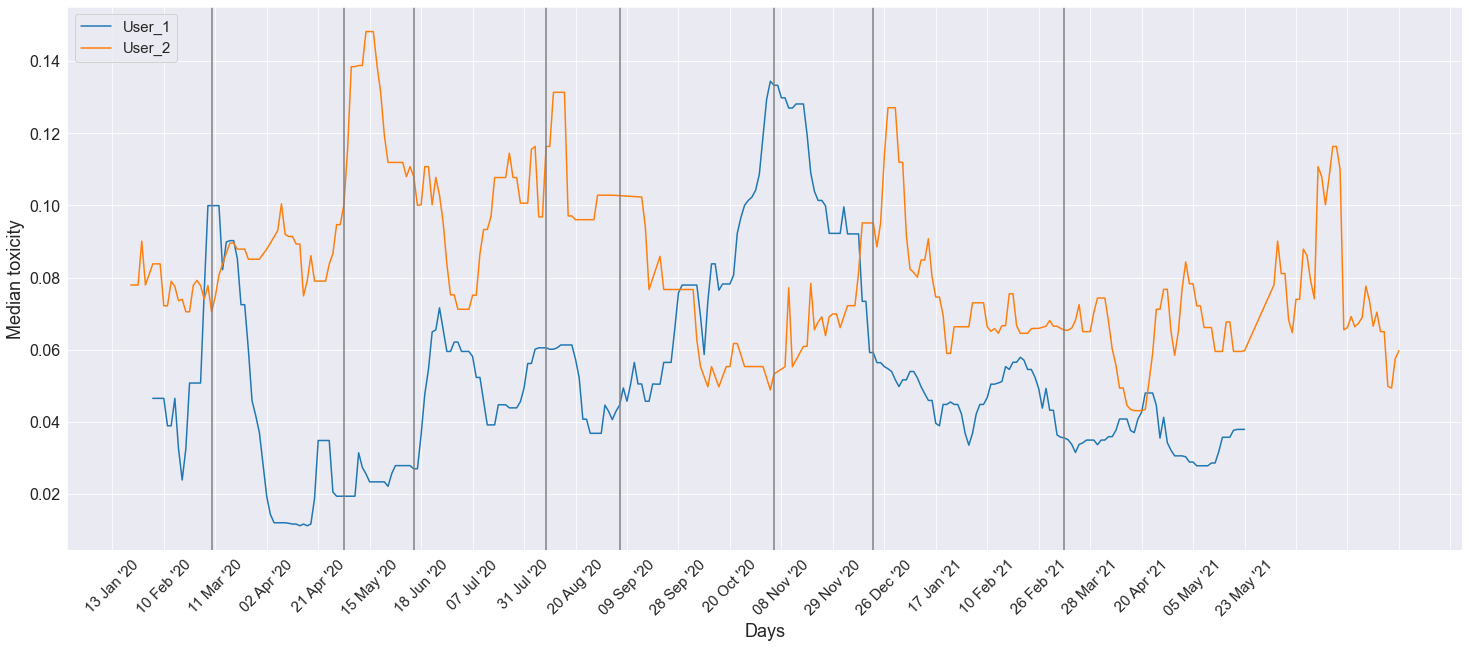

In [203]:
# tox = pd.read_csv(r"../files/tweets/tweets_toxicity.csv", lineterminator="\n", encoding="utf-8",
#                            low_memory=False)
tt = tox[tox["user_screen_name"]=="TommyBrain"]
tt['dates'] = tt[["toxicity", "date"]].groupby('date').transform('median')
res_for_plot = tt.drop_duplicates(subset='date')
res_for_plot.sort_values(by=["date"], inplace=True)
labels = []
for i in res_for_plot["created_at"]:
    x = i.split(" ")
    month = x[1]
    day = x[2]
    year = x[5][2:]
    value = day + " " + month + " '" + year
    labels.append(value)
data = res_for_plot[["date", "dates"]]
data['rolling_avg'] = data.dates.rolling(14).median()
fig, ax = plt.subplots(figsize=(25, 10))
# sns.lineplot( x = 'date',
#              y = 'dates',
#              data = data,
#              label = 'Toxic median')
sns.lineplot(x='date',
             y='rolling_avg',
             data=data,
             label = 'user_si')
sns.lineplot(x='date',
             y='rolling_avg',
             data=data2,
             label = 'user_no')

ax.set_xlabel('Days', fontsize=18)
ax.set_ylabel('Median toxicity', fontsize=18)
plt.yticks(fontsize = 16)

pos = list(data["date"])
lab = labels
plt.xticks(pos, lab)
plt.xticks(rotation=45, fontsize=15)
color = "grey"
plt.axvline(x="2020-03-10", color=color)  # lockdown (fase 1, 9)
plt.axvline(x="2020-05-04", color=color)  # allentamento misure (fase 2, 4)
plt.axvline(x="2020-06-15", color=color)  # convivenza (fase 3)
plt.axvline(x="2020-08-11", color=color)  # nuove restrizioni (10)
plt.axvline(x="2020-09-07", color=color)  # rientro scuole (6)
plt.axvline(x="2020-11-06", color=color)  # coprifuoco e zone a colori (6)
plt.axvline(x="2020-12-21", color=color)  # ok aifa per vaccino e somministrazioni
plt.axvline(x="2021-03-15", color=color)  # Interruzione AZ
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.ylabel('Median toxicity')
plt.legend(labels=["User_1","User_2"], loc='upper left', prop={'size': 15})
plt.show()

In [ ]:
list(tt.tail(1)["date"])[0]

In [ ]:
tt2 = tox[tox["user_screen_name"]=="MinervaMcGrani1"]
tt2 = tt2[tt2["date"]<=list(tt.tail(1)["date"])[0]]
tt2['dates'] = tt2[["toxicity", "date"]].groupby('date').transform('median')
res_for_plot = tt2.drop_duplicates(subset='date')
res_for_plot.sort_values(by=["date"], inplace=True)
labels = []
for i in res_for_plot["created_at"]:
    x = i.split(" ")
    month = x[1]
    day = x[2]
    year = x[5][2:]
    value = day + " " + month + " '" + year
    labels.append(value)
data2 = res_for_plot[["date", "dates"]]
data2['rolling_avg'] = data2.dates.rolling(14).median()
fig, ax = plt.subplots(figsize=(25, 10))
# sns.lineplot( x = 'date',
#              y = 'dates',
#              data = data,
#              label = 'Toxic median')
sns.lineplot(x='date',
             y='rolling_avg',
             data=data2,
             color="red")
# label = 'Rolling avg')

plt.xlabel('Days')

pos = list(data2["date"])
lab = labels
plt.xticks(pos, lab)
plt.xticks(rotation=45, fontsize=10)
color = "grey"
plt.axvline(x="2020-03-06", color=color)  # lockdown (fase 1, 9)
plt.axvline(x="2020-05-04", color=color)  # allentamento misure (fase 2, 4)
plt.axvline(x="2020-06-15", color=color)  # convivenza (fase 3)
plt.axvline(x="2020-08-11", color=color)  # nuove restrizioni (10)
plt.axvline(x="2020-09-07", color=color)  # rientro scuole (6)
plt.axvline(x="2020-11-05", color=color)  # coprifuoco e zone a colori (6)
plt.axvline(x="2020-12-21", color=color)  # ok aifa per vaccino e somministrazioni
plt.axvline(x="2021-03-15", color=color)  # Interruzione AZ
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.ylabel('Median toxicity')
plt.show()

In [113]:
tox

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,NaN,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN,2020-01-27,238
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,NaN,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN,2020-01-27,286
2,L'indifferenza è più colpevole della violenza ...,0.037881,1221730009989120001,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020,NaN,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN,2020-01-27,1
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,NaN,NaN,NaN,NaN,2020-01-27,90
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,NaN,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN,2020-01-27,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907813,Il medico testimonial pro vaccino a Ariachetir...,0.043032,1394609996197937159,CiaoGrosso,[],[],Tue May 18 11:05:08 +0000 2021,NaN,Tue May 18 10:45:35 +0000 2021,NaN,NaN,2021-05-18,506
3907814,"""...«Ha lividi e piastrine basse». E ha richie...",0.045092,1394610015823147011,Rosskitty77,"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],Tue May 18 11:05:13 +0000 2021,NaN,NaN,1.394602e+18,NaN,2021-05-18,1095
3907815,"Vaccinazioni nei luoghi di lavoro, fondamental...",0.007983,1394609887641022464,GuidoIafrate,"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],Tue May 18 11:04:42 +0000 2021,NaN,NaN,NaN,NaN,2021-05-18,3
3907816,A lariachetira c’è un MEDICO DI BASE che ha ap...,0.317855,1394609899963830275,lucabattanta,[],"[{'text': 'lariachetira', 'indices': [14, 27]}]",Tue May 18 11:04:45 +0000 2021,NaN,Tue May 18 10:36:02 +0000 2021,NaN,NaN,2021-05-18,3025


In [114]:
df = pd.DataFrame()
for chunk in pd.read_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\files\tweets\tweets.csv",
                lineterminator="\n", encoding="utf-8", low_memory=False,
                 usecols=["id","rt_user_screen_name","user_screen_name"],
                        chunksize=500000):
    df = df.append(chunk)
    print("done")

done
done
done
done
done
done
done
done
done


In [115]:
merged_df = df.merge(tox, on="id", how="left")
merged_df

,id,user_screen_name_x,rt_user_screen_name,text,toxicity,user_screen_name_y,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status
0,1221739084449832960,planetpaul65,isentinelli,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,planetpaul65,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,NaN,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN,2020-01-27,238.0
1,1221737155380293640,Grace_1207,LidaSezOlbia,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,NaN,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN,2020-01-27,286.0
2,1221730009989120001,MarisaMinervini,milio967,L'indifferenza è più colpevole della violenza ...,0.037881,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020,NaN,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN,2020-01-27,1.0
3,1221737654909382662,LecceSette,NaN,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,LecceSette,"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,NaN,NaN,NaN,NaN,2020-01-27,90.0
4,1221728980203724801,arual812,Annalisa3073,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,NaN,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN,2020-01-27,616.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053196,1394609996197937159,CiaoGrosso,borghi_claudio,Il medico testimonial pro vaccino a Ariachetir...,0.043032,CiaoGrosso,[],[],Tue May 18 11:05:08 +0000 2021,NaN,Tue May 18 10:45:35 +0000 2021,NaN,NaN,2021-05-18,506.0
4053197,1394610015823147011,Rosskitty77,NaN,"""...«Ha lividi e piastrine basse». E ha richie...",0.045092,Rosskitty77,"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],Tue May 18 11:05:13 +0000 2021,NaN,NaN,1.394602e+18,NaN,2021-05-18,1095.0
4053198,1394609887641022464,GuidoIafrate,NaN,"Vaccinazioni nei luoghi di lavoro, fondamental...",0.007983,GuidoIafrate,"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],Tue May 18 11:04:42 +0000 2021,NaN,NaN,NaN,NaN,2021-05-18,3.0
4053199,1394609899963830275,lucabattanta,valy_s,A lariachetira c’è un MEDICO DI BASE che ha ap...,0.317855,lucabattanta,[],"[{'text': 'lariachetira', 'indices': [14, 27]}]",Tue May 18 11:04:45 +0000 2021,NaN,Tue May 18 10:36:02 +0000 2021,NaN,NaN,2021-05-18,3025.0


In [197]:
rt_minerva = merged_df[merged_df["rt_user_screen_name"]=="MinervaMcGrani1"]
rt_tommy = merged_df[merged_df["rt_user_screen_name"]=="TommyBrain"]

In [123]:
rt_minerva["count_status"] = rt_minerva.groupby('date')['date'].transform('count')
rt_minerva.drop_duplicates(subset=["date"], keep="last", inplace=True)
rt_tommy["count_status"] = rt_tommy.groupby('date')['date'].transform('count')
rt_tommy.drop_duplicates(subset=["date"], keep="last", inplace=True)

In [149]:
np.nanmean(rt_tommy["count_status"])

1.489795918367347

In [150]:
np.nanmean(rt_minerva["count_status"])

80.15151515151516

In [141]:
for row in data.itertuples():
    if row[1] in list(data["date"]):
        print(row[1])

2020-01-03
2020-01-08
2020-01-13
2020-01-15
2020-01-18
2020-01-19
2020-01-20
2020-01-25
2020-01-26
2020-01-27
2020-01-28
2020-01-31
2020-02-02
2020-02-03
2020-02-05
2020-02-06
2020-02-10
2020-02-11
2020-02-21
2020-02-22
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-03-01
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-10
2020-03-11
2020-03-12
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-21
2020-03-22
2020-03-24
2020-03-25
2020-03-26
2020-03-28
2020-03-29
2020-03-31
2020-04-02
2020-04-03
2020-04-07
2020-04-08
2020-04-09
2020-04-11
2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-20
2020-04-21
2020-04-25
2020-04-29
2020-04-30
2020-05-01
2020-05-02
2020-05-03
2020-05-04
2020-05-05
2020-05-06
2020-05-10
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-25
2020-05-26
2020-05-27
2020-05-30
2020-05-31
2020-06-14
2020-06-15
2020-06-17
2020-06-18
2020-06-20
2020-06-21
2020-06-22
2020-06-23

In [132]:
data2

,date,dates,rolling_avg
12775,2020-01-02,0.117249,NaN
1986,2020-01-03,0.097633,NaN
5536,2020-01-04,0.023975,NaN
6379,2020-01-05,0.117297,NaN
7481,2020-01-06,0.033074,NaN
...,...,...,...
3884054,2021-05-17,0.099781,0.059529
3522741,2021-05-18,0.073713,0.059529
3554100,2021-05-20,0.057731,0.057531
3555707,2021-05-22,0.218925,0.059728


In [185]:
# tt2["count_status".groupby('date')['date'].transform('count')
np.nanmean(tt2["count_status"])

18.197791490743747

In [184]:
tt2[["date","count_status"]].sort_values(by=["date"],ascending=True)

,date,count_status
13002,2020-01-02,12
12895,2020-01-02,12
12881,2020-01-02,12
12872,2020-01-02,12
12775,2020-01-02,12
...,...,...
3561613,2021-05-23,8
3564471,2021-05-23,8
3564537,2021-05-23,8
3564838,2021-05-23,8


In [186]:
tt2[["toxicity"]]

104        0.150427
516        0.100855
566        0.157432
743        0.149567
1618       0.039942
             ...   
3899658    0.019714
3899699    0.259045
3899712    0.139697
3899749    0.073713
3899763    0.010135
Name: toxicity, Length: 3079, dtype: float64

In [198]:
rt_minerva

,id,user_screen_name_x,rt_user_screen_name,text,toxicity,user_screen_name_y,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status
497,1222298088662093824,piersar62,MinervaMcGrani1,In Toscana si taglia la guardia medica notturn...,0.100855,piersar62,[],[],Tue Jan 28 23:19:08 +0000 2020,NaN,Tue Jan 28 23:16:42 +0000 2020,1.222156e+18,NaN,2020-01-28,1211.0
516,1222302972983508992,Peter_Italy,MinervaMcGrani1,In Toscana si taglia la guardia medica notturn...,0.100855,Peter_Italy,[],[],Tue Jan 28 23:38:32 +0000 2020,NaN,Tue Jan 28 23:16:42 +0000 2020,1.222156e+18,NaN,2020-01-28,474.0
542,1222304567339241473,IMoresi,MinervaMcGrani1,In Toscana si taglia la guardia medica notturn...,0.100855,IMoresi,[],[],Tue Jan 28 23:44:52 +0000 2020,NaN,Tue Jan 28 23:16:42 +0000 2020,1.222156e+18,NaN,2020-01-28,394.0
575,1222298456724779008,Graziel65255465,MinervaMcGrani1,In Toscana si taglia la guardia medica notturn...,0.100855,Graziel65255465,[],[],Tue Jan 28 23:20:35 +0000 2020,NaN,Tue Jan 28 23:16:42 +0000 2020,1.222156e+18,NaN,2020-01-28,1409.0
581,1222297930947858434,AncillottoL,MinervaMcGrani1,In Toscana si taglia la guardia medica notturn...,0.100855,AncillottoL,[],[],Tue Jan 28 23:18:30 +0000 2020,NaN,Tue Jan 28 23:16:42 +0000 2020,1.222156e+18,NaN,2020-01-28,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052584,1394604748297363456,SemperAdamantes,MinervaMcGrani1,valy_s tommasomatic L’anno scorso non c’erano ...,0.259045,SemperAdamantes,[],[],Tue May 18 10:44:17 +0000 2021,NaN,Mon May 17 23:45:52 +0000 2021,NaN,NaN,2021-05-18,1664.0
4052593,1394605005295038466,RinoRizzardi,MinervaMcGrani1,Lo sapete che le spese della sperimentazione ...,0.099781,RinoRizzardi,"[{'url': 'https://t.co/aW5w6pVMBv', 'expanded_...",[],Tue May 18 10:45:18 +0000 2021,NaN,Mon May 17 18:57:57 +0000 2021,NaN,NaN,2021-05-18,177.0
4052761,1394606089342181380,MercPat,MinervaMcGrani1,Lo sapete che le spese della sperimentazione ...,0.099781,MercPat,"[{'url': 'https://t.co/aW5w6pVMBv', 'expanded_...",[],Tue May 18 10:49:36 +0000 2021,NaN,Mon May 17 18:57:57 +0000 2021,NaN,NaN,2021-05-18,777.0
4052897,1394607696679157761,Loestestest,MinervaMcGrani1,valy_s tommasomatic L’anno scorso non c’erano ...,0.259045,Loestestest,[],[],Tue May 18 10:56:00 +0000 2021,NaN,Mon May 17 23:45:52 +0000 2021,NaN,NaN,2021-05-18,742.0


In [200]:
data2

,date,dates,rolling_avg
12775,2020-01-02,0.117249,NaN
1986,2020-01-03,0.097633,NaN
5536,2020-01-04,0.023975,NaN
6379,2020-01-05,0.117297,NaN
7481,2020-01-06,0.033074,NaN
...,...,...,...
3884054,2021-05-17,0.099781,0.059529
3522741,2021-05-18,0.073713,0.059529
3554100,2021-05-20,0.057731,0.057531
3555707,2021-05-22,0.218925,0.059728


In [196]:
rt_minerva["count_status"] = rt_minerva.groupby('date')['date'].transform('count')
rt_minerva[["date","count_status"]].sort_values(by=["date"],ascending=True)

,date,count_status
13869,2020-01-02,89.0
13342,2020-01-02,89.0
13363,2020-01-02,89.0
13398,2020-01-02,89.0
13422,2020-01-02,89.0
...,...,...
3737612,NaN,NaN
3738032,NaN,NaN
3752277,NaN,NaN
3828950,NaN,NaN
